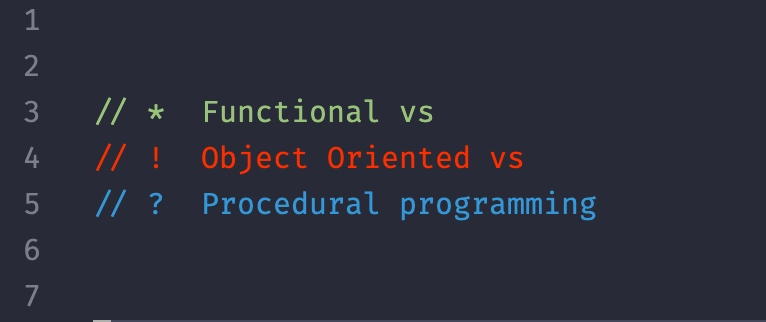

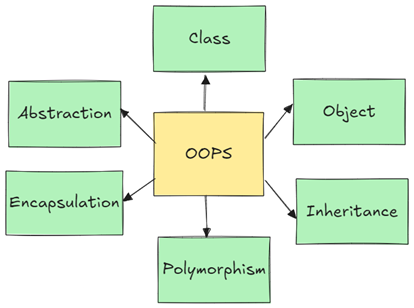

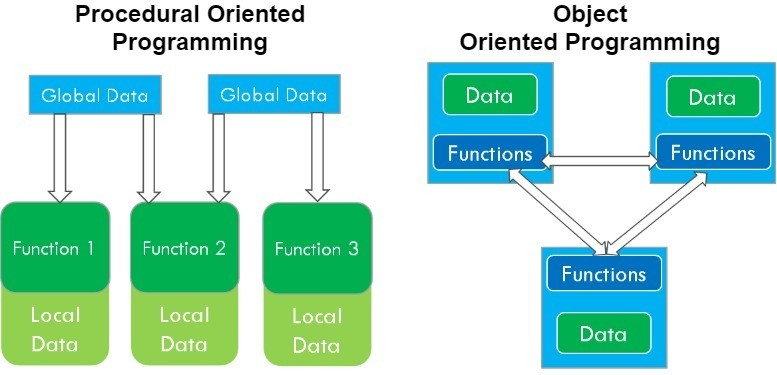

In [1]:
### Obiektowość.
###################

# Klasa
# Zmienne publiczne i prywatne oraz metody

class Example:
    def __init__(self, val):
        self._val = val #_ oznacza prywatną zmienną
        self.val2 = val * 2
        
    def get_val(self):
        return self._val #self?
    
    def change_val(self, x):
        self.val2 = x
        
class Example2:
    def __init__(self, val):
        self._val = val #_ oznacza prywatną zmienną
        self.val2 = val * 3
        
    def get_val(self):
        return self._val #self?
    
    def change_val(self, x):
        self.val2 = x

In [16]:
e = Example(3)
e.get_val() # <=> Example.get_val(e)

3

In [9]:
e.val2

9

In [5]:
e.change_val(7)
e.val2

7

In [8]:
e.val2 = 9

In [13]:
e1 = Example2(3)

e.get_val()

9

In [17]:
e.val2

6

In [14]:
e1.get_val()

3

In [15]:
e1.val2

9

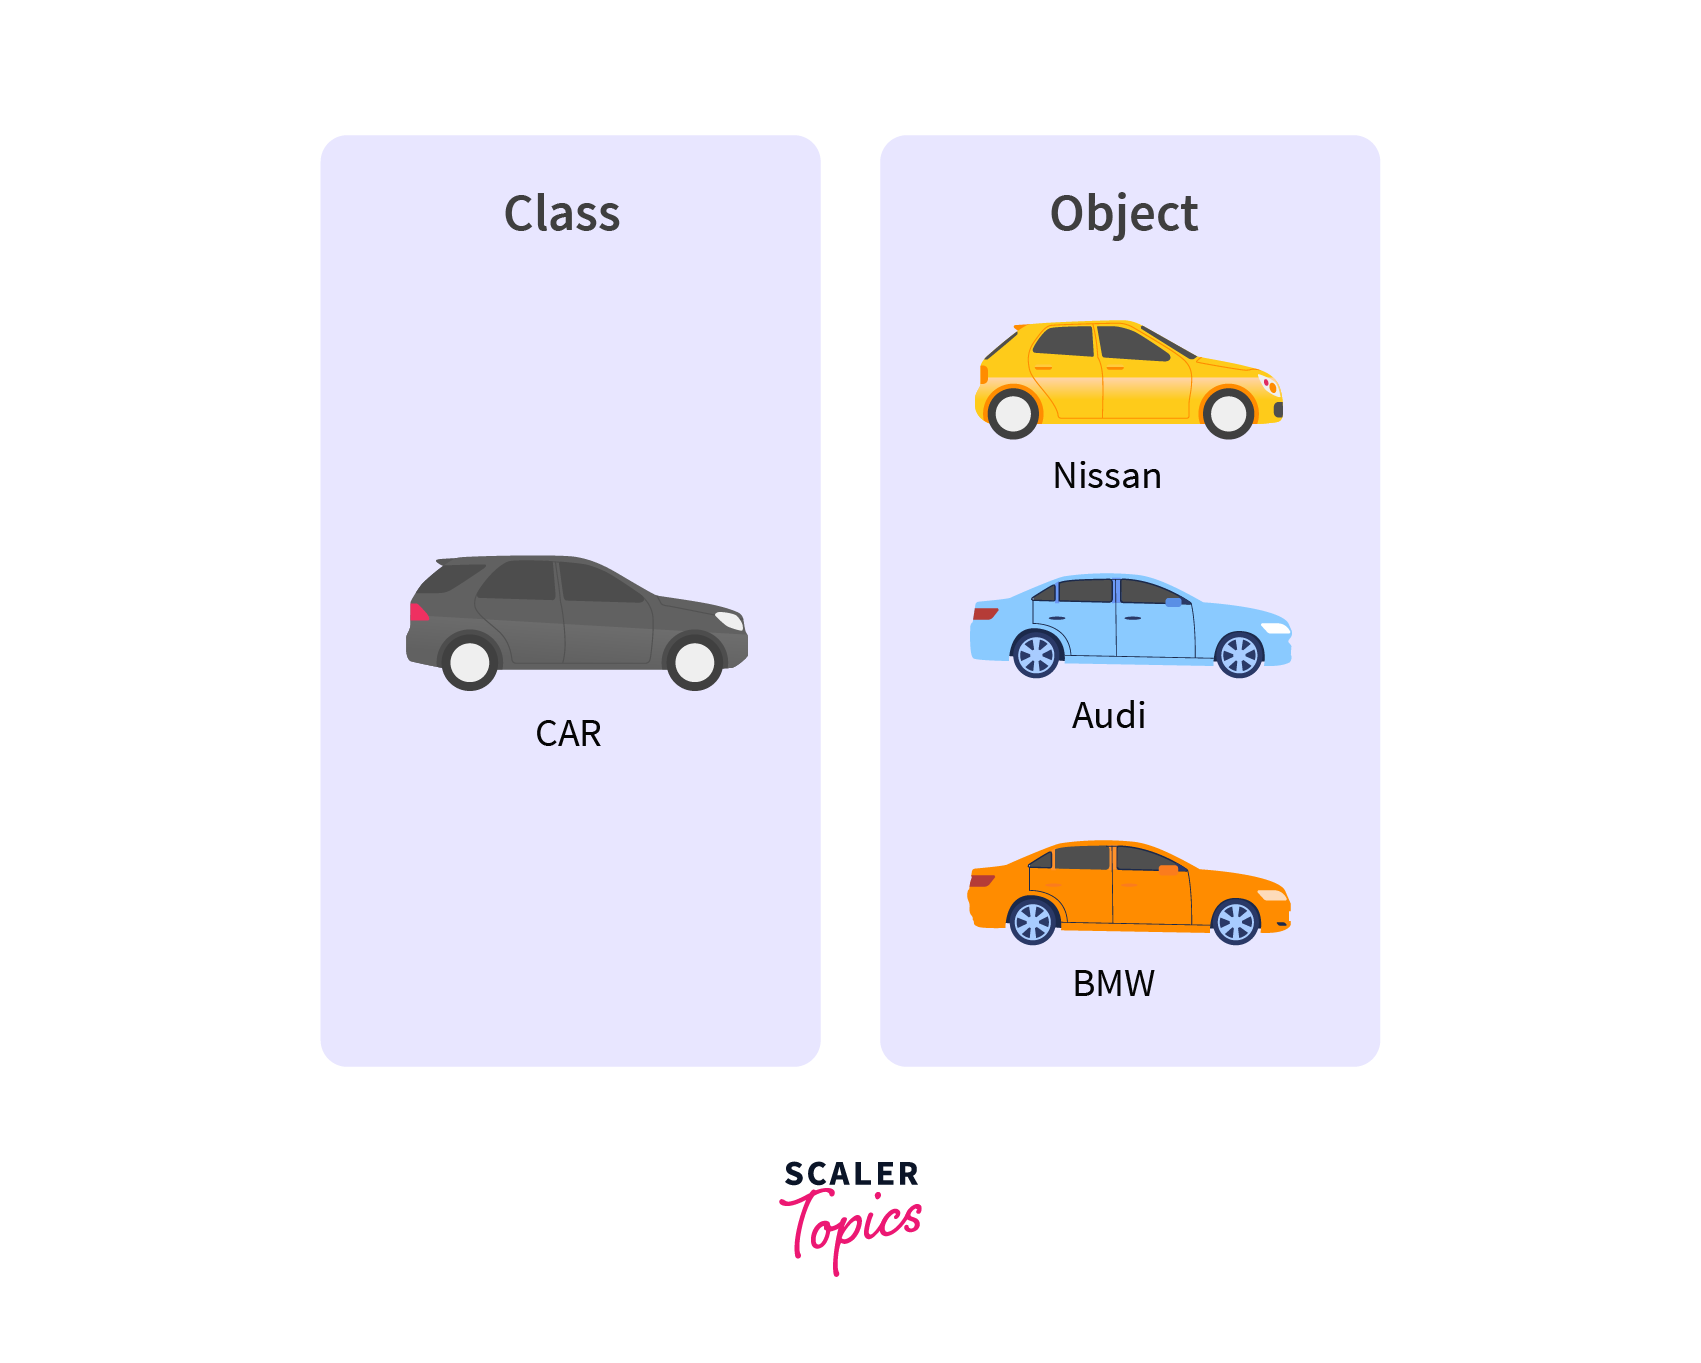

In [18]:
### Dziedziczenie.
#####################

class Mammal:
  def __init__(self, mammalName):
    print(mammalName, 'is a warm-blooded animal.')
    
class Dog(Mammal):
  def __init__(self):
    print('Dog has four legs.')
    super().__init__('Dog')
    
mm1 = Mammal('Cow')
d1 = Dog()

Cow is a warm-blooded animal.
Dog has four legs.
Dog is a warm-blooded animal.


In [ ]:
# Dodatkowe metody przy dziedziczeniu

In [19]:
class BetterExample(Example):
    def __init__(self, val):
        super().__init__(val)
        self.val2 = val * 10
    
    def set_val(self, val):
        self._val = val

be = BetterExample(3)

In [ ]:
be.

In [20]:
be.get_val()

3

In [21]:
be.set_val(2)

In [22]:
be.get_val()

2

In [23]:
be.val2

30

In [24]:
e.set_val(1)

AttributeError: 'Example' object has no attribute 'set_val'

In [ ]:
#be._val = 3

In [25]:
# po wielu klasach

class Animal:
  def __init__(self, Animal):
    print(Animal, 'is an animal.');

class Mammal(Animal):
  def __init__(self, mammalName):
    print(mammalName, 'is a warm-blooded animal.')
    super().__init__(mammalName)
    
class NonWingedMammal(Mammal):
  def __init__(self, NonWingedMammal):
    print(NonWingedMammal, "can't fly.")
    super().__init__(NonWingedMammal)

class NonMarineMammal(Mammal):
  def __init__(self, NonMarineMammal):
    print(NonMarineMammal, "can't swim.")
    super().__init__(NonMarineMammal)

class Dog(NonMarineMammal, NonWingedMammal):
  def __init__(self):
    print('Dog has 4 legs.');
    super().__init__('Dog')
    
    
d = Dog()

Dog has 4 legs.
Dog can't swim.
Dog can't fly.
Dog is a warm-blooded animal.
Dog is an animal.


In [26]:
bat = NonMarineMammal('Bat')

Bat can't swim.
Bat is a warm-blooded animal.
Bat is an animal.


In [ ]:
#----
# https://stackoverflow.com/questions/3277367/how-does-pythons-super-work-with-multiple-inheritance

class First:
    def __init__(self):
        super(First, self).__init__()
        print("first")

class Second:
    def __init__(self):
        super(Second, self).__init__()
        print("second")

class Third(First, Second):
    def __init__(self):
        super(Second, self).__init__()
        print("third")

xx = Third()

In [27]:
### Polimorfizm.
###################

class Animal:
    def voice(self):
        raise Exception()

class Cat(Animal):
    def voice(self):
        print('Meaw!')

class Dog(Animal):
    def voice(self):
        print('Bark!')

class Rat(Animal):
    def voice(self):
        print('Piiii!')

def pet(a):
    a.voice()

cat, dog = Cat(), Dog()

In [28]:
cat.voice()

Meaw!


In [29]:
rat = Rat()

In [30]:
rat.voice()

Piiii!


In [31]:
pet(cat)

Meaw!


In [32]:
pet(dog)

Bark!


In [34]:
isinstance(cat, Cat)

True

In [35]:
isinstance(cat, Animal)

True

In [36]:
isinstance(cat, Dog)

False

In [37]:
isinstance(e, Animal)

False

In [33]:
pet(e)

AttributeError: 'Example' object has no attribute 'voice'

In [38]:
def better_pet(x):
    if isinstance(x, Animal):
        return pet(x)
    else:
        print('This is an object from other class!')
    
better_pet(cat)

Meaw!


In [39]:
rat = Rat()
better_pet(rat)

Piiii!


In [40]:
better_pet(e)

This is an object from other class!


In [ ]:
# Dekoratory
# Hinty typów
# Dataclasses

In [ ]:
@staticmethod
def xyz()

In [41]:
#Dekoratory
import functools

def log_method_call(func):
    @functools.wraps(func)
    def wrapper(self, *args, **kwargs):
        class_name = self.__class__.__name__
        print(f"[{class_name}] Wywołanie metody: {func.__name__} z argumentami: {args}, {kwargs}")
        result = func(self, *args, **kwargs)
        print(f"[{class_name}] Metoda {func.__name__} zakończona. Wynik: {result}")
        return result
    return wrapper

class MyClass:
    def __init__(self, value):
        self.value = value

    @log_method_call
    def process_value(self, factor):
        new_value = self.value * factor
        self.value = new_value
        return new_value

print("--- Demonstracja Dekoratora ---")
obj = MyClass(10)
print(f"Wartość początkowa: {obj.value}")
result = obj.process_value(2)
print(f"Wartość po przetworzeniu: {obj.value}")
print("-" * 20)

--- Demonstracja Dekoratora ---
Wartość początkowa: 10
[MyClass] Wywołanie metody: process_value z argumentami: (2,), {}
[MyClass] Metoda process_value zakończona. Wynik: 20
Wartość po przetworzeniu: 20
--------------------


In [2]:
#Hinty typów
from typing import List, Dict, Optional

class Book:
    title: str
    author: str
    year: int
    reviews: List[str]

    def __init__(self, title: str, author: str, year: int) -> None:
        self.title = title
        self.author = author
        self.year = year
        self.reviews = []

    def add_review(self, review_text: str) -> None:
        self.reviews.append(review_text)

    def get_info(self) -> str:
        return f"{self.title} by {self.author} ({self.year})"

    def get_reviews_dict(self, include_year: bool = False) -> Dict[int, str]:
         return {i: review for i, review in enumerate(self.reviews)}


print("\n--- Demonstracja Hintów Typów ---")
my_book: Book = Book("Władca Pierścieni", "J.R.R. Tolkien", 1954)
my_book.add_review("Epicka opowieść!")
info: str = my_book.get_info()
print(info)
print(f"Recenzje ({type(my_book.reviews)}): {my_book.reviews}")
reviews_dict: Dict[int, str] = my_book.get_reviews_dict()
print(f"Recenzje w słowniku ({type(reviews_dict)}): {reviews_dict}")
print("-" * 20)


--- Demonstracja Hintów Typów ---
Władca Pierścieni by J.R.R. Tolkien (1954)
Recenzje (<class 'list'>): ['Epicka opowieść!']
Recenzje w słowniku (<class 'dict'>): {0: 'Epicka opowieść!'}
--------------------


In [3]:
#dataclasses

from dataclasses import dataclass, field
from typing import List

@dataclass
class Product:
    name: str
    price: float
    quantity: int = 0
    tags: List[str] = field(default_factory=list)

print("\n--- Demonstracja Dataclasses ---")
laptop = Product("Laptop XYZ", 1200.50, 5)
keyboard = Product("Klawiatura ABC", 75.00, quantity=10)
mouse = Product("Mysz DEF", 25.00)
phone = Product("Telefon GHI", 800.00, tags=["smartfon", "5G"])

print(laptop)
print(keyboard)
print(mouse)
print(phone)

print(f"Czy laptop == keyboard? {laptop == keyboard}")
same_laptop = Product("Laptop XYZ", 1200.50, 5, tags=[])
print(f"Czy laptop == same_laptop? {laptop == same_laptop}")
same_laptop_strict = Product("Telefon GHI", 800.00, tags=["smartfon", "5G"])
print(f"Czy phone == same_phone_strict? {phone == same_phone_strict}")

print(f"Nazwa: {laptop.name}, Cena: {laptop.price}, Ilość: {laptop.quantity}")
print(f"Tagi telefonu: {phone.tags}")
print("-" * 20)


--- Demonstracja Dataclasses ---
Product(name='Laptop XYZ', price=1200.5, quantity=5, tags=[])
Product(name='Klawiatura ABC', price=75.0, quantity=10, tags=[])
Product(name='Mysz DEF', price=25.0, quantity=0, tags=[])
Product(name='Telefon GHI', price=800.0, quantity=0, tags=['smartfon', '5G'])
Czy laptop == keyboard? False
Czy laptop == same_laptop? True
Czy phone == same_laptop_strict? True
Nazwa: Laptop XYZ, Cena: 1200.5, Ilość: 5
Tagi telefonu: ['smartfon', '5G']
--------------------
